#### DATA PROCESSING 

##### FEATURE ENGINEERING

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [56]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [57]:
df = df.drop_duplicates()
df = df.dropna()

In [58]:
df.columns.to_list()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [59]:
df = df.replace({'No': 0, 'Yes' : 1, 
                 'Urban' : 0, 'Rural' : 1})


In [60]:
gender = pd.get_dummies(df['gender']) 
df = pd.DataFrame.join(df, gender)

work_type = pd.get_dummies(df['work_type']) 
df = pd.DataFrame.join(df, work_type)

smoking_status = pd.get_dummies(df['smoking_status']) 
df = pd.DataFrame.join(df, smoking_status)


In [61]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,1,Private,0,228.69,36.6,...,0,0,0,1,0,0,0,1,0,0
2,31112,Male,80.0,0,1,1,Private,1,105.92,32.5,...,0,0,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,1,Private,0,171.23,34.4,...,0,0,0,1,0,0,0,0,0,1
4,1665,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,...,0,0,0,0,1,0,0,0,1,0
5,56669,Male,81.0,0,0,1,Private,0,186.21,29.0,...,0,0,0,1,0,0,0,1,0,0


In [62]:
df = df.drop(['gender', 'smoking_status', 'work_type'], axis=1)

In [63]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,...,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,1,0,228.69,36.6,1,0,...,0,0,0,1,0,0,0,1,0,0
2,31112,80.0,0,1,1,1,105.92,32.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,0,171.23,34.4,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,1,174.12,24.0,1,1,...,0,0,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,1,0,186.21,29.0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,0,1,103.08,18.6,0,1,...,0,0,0,0,0,1,1,0,0,0
5106,44873,81.0,0,0,1,0,125.20,40.0,0,1,...,0,0,0,0,1,0,0,0,1,0
5107,19723,35.0,0,0,1,1,82.99,30.6,0,1,...,0,0,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,1,1,166.29,25.6,0,0,...,0,0,0,1,0,0,0,1,0,0


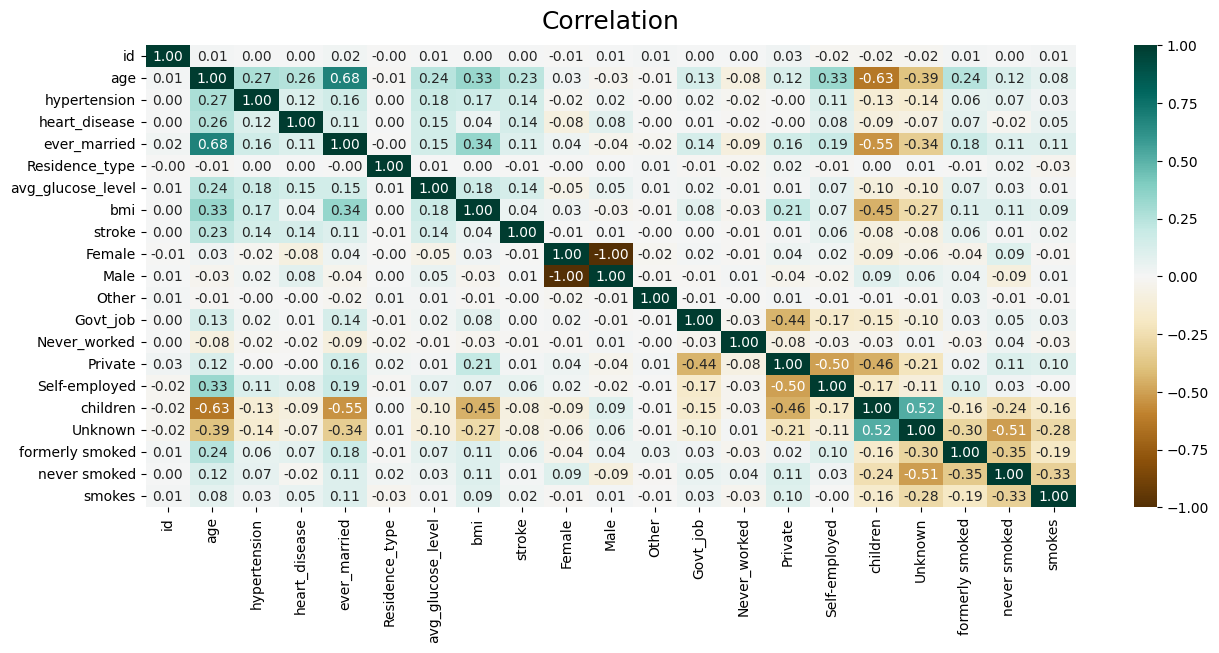

In [64]:
corr_df = df.corr(numeric_only=True)

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1)
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=12);

plt.show()

In [65]:
df.to_csv('data/data_numbers_dummis.csv', index=False)